In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import torch
from src.models.lbcnn.axial_lbcnn import SmallAxialUNetLBC, AxialUNetLBC
from src.models.lbcnn.axial_unet import AxialUNet, SmallAxialUNet
from src.models.lbcnn.lbc_unet import UNetLBP, SmallUNetLBP
from src.models.unet.unet_model import UNet, SmallUNet

In [2]:
def load_json_metrics(file_path):
    with open(file_path, 'r') as fp:
        metrics = json.load(fp)
    return metrics

def plot_json(json_dict, name, ax):
    ax.plot(list(json_dict.keys()), list(json_dict.values()), label=name)
    
def get_mean_metric(metric_dict, from_epoch, to_epoch=None):
    df = pd.DataFrame.from_dict(metric_dict, orient='index')
    return df[from_epoch:to_epoch].mean().item()

def get_n_params(model, verbose=False):
    pytorch_total_params = sum(p.numel() for p in model.parameters())
    if verbose:
        print('Total Params: ', pytorch_total_params)

    params = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            params += param.numel()
    if verbose:
        print('Trainable Params: ', params)
    return pytorch_total_params, params

### IoU Metrics

In [3]:
metric_of_interest = 'iou'
dataset = 'val_set'

# UNet
unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/glowing_armadillo_326_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small UNet
small_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/playful_snowball_331_small_unet_floe-mean-{metric_of_interest}-epoch.json')

# LBC UNet
lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/royal_darkness_330_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small LBC UNet
small_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/elated_violet_333_small_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Deeplab MobileNet
lraspp_mobile_net = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/vocal_brook_343_lraspp_floe-mean-{metric_of_interest}-epoch.json')

# DSC UNet
dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/smart_silence_327_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC UNet
small_dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/polar_shadow_332_small_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# DSC LBC UNet
dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/gentle_yogurt_328_dsc_unet_lbp_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC LBC UNet
small_dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/dulcet_meadow_329_dsc_lbc_small_unet_floe-mean-{metric_of_interest}-epoch.json')


metric_dicts = {
    'unet': unet, 
    'small_unet': small_unet,
    'lbc_unet': lbc_unet, 
    'small_lbc_unet': small_lbc_unet,
    'lraspp_mobile_net': lraspp_mobile_net,
    'dsc_unet': dsc_unet,
    'small_dsc_unet': small_dsc_unet,
    'dsc_lbc_unet': dsc_lbc_unet,
    'small_dsc_lbc_unet': small_dsc_lbc_unet,
}

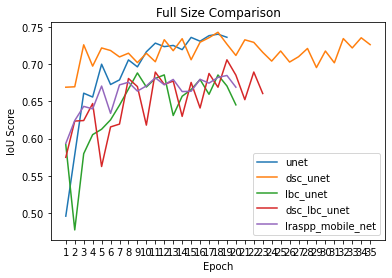

In [4]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
plot_json(unet, 'unet', ax)
plot_json(dsc_unet, 'dsc_unet', ax)
plot_json(lbc_unet, 'lbc_unet', ax)
plot_json(dsc_lbc_unet, 'dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

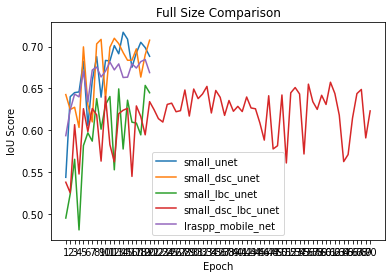

In [5]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
plot_json(small_unet, 'small_unet', ax)
plot_json(small_dsc_unet, 'small_dsc_unet', ax)
plot_json(small_lbc_unet, 'small_lbc_unet', ax)
plot_json(small_dsc_lbc_unet, 'small_dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

In [6]:
FROM_EPOCH = 5
avg_metric_dict = {}
for model in metric_dicts.keys():
    avg_metric_dict[model] = get_mean_metric(metric_dicts[model], FROM_EPOCH, to_epoch=10)

In [7]:
avg_metric_dict

{'unet': 0.6938370538055897,
 'small_unet': 0.6550368452742695,
 'lbc_unet': 0.6586648042500018,
 'small_lbc_unet': 0.6105682600215077,
 'lraspp_mobile_net': 0.663094312928617,
 'dsc_unet': 0.711644612737,
 'small_dsc_unet': 0.6577669308781624,
 'dsc_lbc_unet': 0.640656966753304,
 'small_dsc_lbc_unet': 0.6091647772192955}

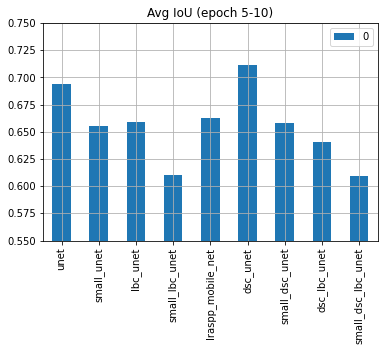

In [8]:
ax = pd.DataFrame.from_dict(avg_metric_dict, orient='index').plot.bar(ylim=(0.55, 0.75), title='Avg IoU (epoch 5-10)')
ax.grid();

### Acc

In [9]:
metric_of_interest = 'acc'
dataset = 'val_set'

# UNet
unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/glowing_armadillo_326_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small UNet
small_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/playful_snowball_331_small_unet_floe-mean-{metric_of_interest}-epoch.json')

# LBC UNet
lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/royal_darkness_330_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small LBC UNet
small_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/elated_violet_333_small_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Deeplab MobileNet
lraspp_mobile_net = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/vocal_brook_343_lraspp_floe-mean-{metric_of_interest}-epoch.json')

# DSC UNet
dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/smart_silence_327_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC UNet
small_dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/polar_shadow_332_small_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# DSC LBC UNet
dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/gentle_yogurt_328_dsc_unet_lbp_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC LBC UNet
small_dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/dulcet_meadow_329_dsc_lbc_small_unet_floe-mean-{metric_of_interest}-epoch.json')


metric_dicts = {
    'unet': unet, 
    'small_unet': small_unet,
    'lbc_unet': lbc_unet, 
    'small_lbc_unet': small_lbc_unet,
    'lraspp_mobile_net': lraspp_mobile_net,
    'dsc_unet': dsc_unet,
    'small_dsc_unet': small_dsc_unet,
    'dsc_lbc_unet': dsc_lbc_unet,
    'small_dsc_lbc_unet': small_dsc_lbc_unet,
}

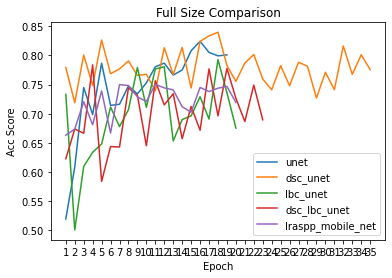

In [16]:
fig, ax = plt.subplots()

ax.set_ylabel('Acc Score')
ax.set_xlabel('Epoch')
plot_json(unet, 'unet', ax)
plot_json(dsc_unet, 'dsc_unet', ax)
plot_json(lbc_unet, 'lbc_unet', ax)
plot_json(dsc_lbc_unet, 'dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

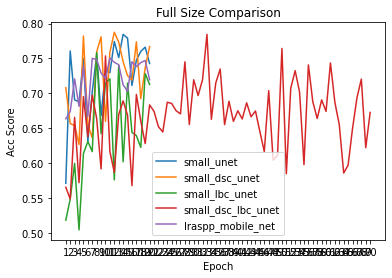

In [15]:
fig, ax = plt.subplots()

ax.set_ylabel('Acc Score')
ax.set_xlabel('Epoch')
plot_json(small_unet, 'small_unet', ax)
plot_json(small_dsc_unet, 'small_dsc_unet', ax)
plot_json(small_lbc_unet, 'small_lbc_unet', ax)
plot_json(small_dsc_lbc_unet, 'small_dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

In [12]:
FROM_EPOCH = 5
avg_metric_dict = {}
for model in metric_dicts.keys():
    avg_metric_dict[model] = get_mean_metric(metric_dicts[model], FROM_EPOCH, to_epoch=10)

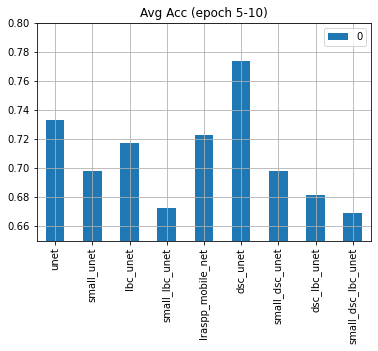

In [14]:
ax = pd.DataFrame.from_dict(avg_metric_dict, orient='index').plot.bar(ylim=(0.65, 0.8), title='Avg Acc (epoch 5-10)')
ax.grid();

## Test Set

In [17]:
metric_of_interest = 'iou'
dataset = 'test_set'

# UNet
unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/glowing_armadillo_326_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small UNet
small_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/playful_snowball_331_small_unet_floe-mean-{metric_of_interest}-epoch.json')

# LBC UNet
lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/royal_darkness_330_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small LBC UNet
small_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/elated_violet_333_small_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Deeplab MobileNet
lraspp_mobile_net = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/vocal_brook_343_lraspp_floe-mean-{metric_of_interest}-epoch.json')

# DSC UNet
dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/smart_silence_327_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC UNet
small_dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/polar_shadow_332_small_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# DSC LBC UNet
dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/gentle_yogurt_328_dsc_unet_lbp_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC LBC UNet
small_dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/dulcet_meadow_329_dsc_lbc_small_unet_floe-mean-{metric_of_interest}-epoch.json')


metric_dicts = {
    'unet': unet, 
    'small_unet': small_unet,
    'lbc_unet': lbc_unet, 
    'small_lbc_unet': small_lbc_unet,
    'lraspp_mobile_net': lraspp_mobile_net,
    'dsc_unet': dsc_unet,
    'small_dsc_unet': small_dsc_unet,
    'dsc_lbc_unet': dsc_lbc_unet,
    'small_dsc_lbc_unet': small_dsc_lbc_unet,
}

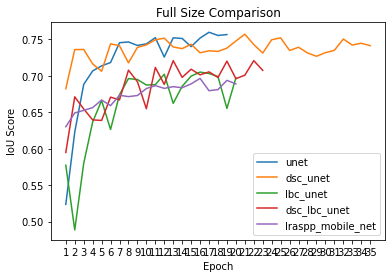

In [18]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
plot_json(unet, 'unet', ax)
plot_json(dsc_unet, 'dsc_unet', ax)
plot_json(lbc_unet, 'lbc_unet', ax)
plot_json(dsc_lbc_unet, 'dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

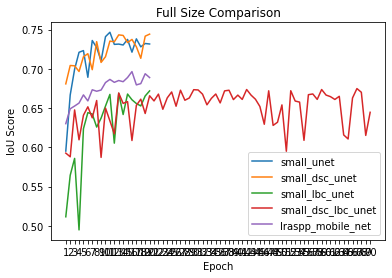

In [19]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
plot_json(small_unet, 'small_unet', ax)
plot_json(small_dsc_unet, 'small_dsc_unet', ax)
plot_json(small_lbc_unet, 'small_lbc_unet', ax)
plot_json(small_dsc_lbc_unet, 'small_dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

In [20]:
FROM_EPOCH = 5
avg_metric_dict = {}
for model in metric_dicts.keys():
    avg_metric_dict[model] = get_mean_metric(metric_dicts[model], FROM_EPOCH, to_epoch=10)

In [21]:
avg_metric_dict

{'unet': 0.7390786403939128,
 'small_unet': 0.7207366543710233,
 'lbc_unet': 0.6758032803237438,
 'small_lbc_unet': 0.6404413471519947,
 'lraspp_mobile_net': 0.6718838242068886,
 'dsc_unet': 0.7368320638537407,
 'small_dsc_unet': 0.7152997613549233,
 'dsc_lbc_unet': 0.6784567564502358,
 'small_dsc_lbc_unet': 0.6371946078687907}

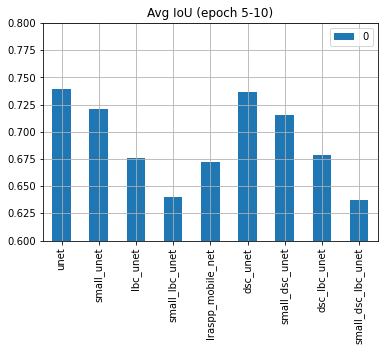

In [23]:
ax = pd.DataFrame.from_dict(avg_metric_dict, orient='index').plot.bar(ylim=(0.6,0.8), title='Avg IoU (epoch 5-10)')
ax.grid();

### Acc

In [24]:
metric_of_interest = 'acc'
dataset = 'test_set'

# UNet
unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/glowing_armadillo_326_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small UNet
small_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/playful_snowball_331_small_unet_floe-mean-{metric_of_interest}-epoch.json')

# LBC UNet
lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/royal_darkness_330_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small LBC UNet
small_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/elated_violet_333_small_lbc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Deeplab MobileNet
lraspp_mobile_net = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/vocal_brook_343_lraspp_floe-mean-{metric_of_interest}-epoch.json')

# DSC UNet
dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/smart_silence_327_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC UNet
small_dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/polar_shadow_332_small_dsc_unet_floe-mean-{metric_of_interest}-epoch.json')

# DSC LBC UNet
dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/gentle_yogurt_328_dsc_unet_lbp_floe-mean-{metric_of_interest}-epoch.json')

# Small DSC LBC UNet
small_dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/floe/{dataset}/dulcet_meadow_329_dsc_lbc_small_unet_floe-mean-{metric_of_interest}-epoch.json')


metric_dicts = {
    'unet': unet, 
    'small_unet': small_unet,
    'lbc_unet': lbc_unet, 
    'small_lbc_unet': small_lbc_unet,
    'lraspp_mobile_net': lraspp_mobile_net,
    'dsc_unet': dsc_unet,
    'small_dsc_unet': small_dsc_unet,
    'dsc_lbc_unet': dsc_lbc_unet,
    'small_dsc_lbc_unet': small_dsc_lbc_unet,
}

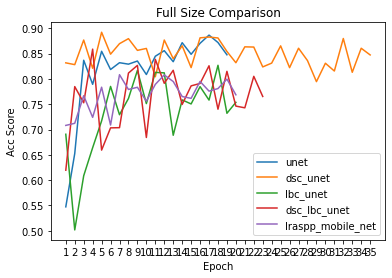

In [25]:
fig, ax = plt.subplots()

ax.set_ylabel('Acc Score')
ax.set_xlabel('Epoch')
plot_json(unet, 'unet', ax)
plot_json(dsc_unet, 'dsc_unet', ax)
plot_json(lbc_unet, 'lbc_unet', ax)
plot_json(dsc_lbc_unet, 'dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

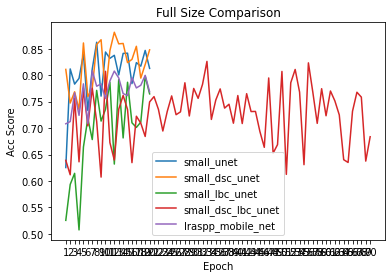

In [26]:
fig, ax = plt.subplots()

ax.set_ylabel('Acc Score')
ax.set_xlabel('Epoch')
plot_json(small_unet, 'small_unet', ax)
plot_json(small_dsc_unet, 'small_dsc_unet', ax)
plot_json(small_lbc_unet, 'small_lbc_unet', ax)
plot_json(small_dsc_lbc_unet, 'small_dsc_lbc_unet', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

In [27]:
FROM_EPOCH = 5
avg_metric_dict = {}
for model in metric_dicts.keys():
    avg_metric_dict[model] = get_mean_metric(metric_dicts[model], FROM_EPOCH, to_epoch=10)

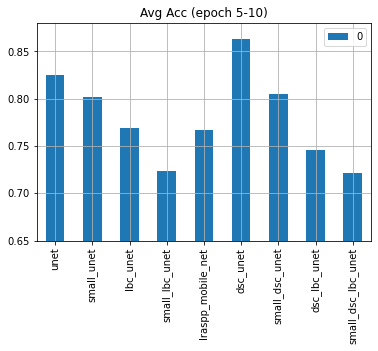

In [28]:
ax = pd.DataFrame.from_dict(avg_metric_dict, orient='index').plot.bar(ylim=(0.65,0.88), title='Avg Acc (epoch 5-10)')
ax.grid();

### Model Parameters

In [3]:
unet_model = UNet(n_channels=3, n_classes=3, bilinear=True)
small_unet_model = SmallUNet(n_channels=3, n_classes=3, bilinear=True)
axial_unet_model = AxialUNet(3, 3, 64)
small_axial_unet_model = SmallAxialUNet(3, 3, 64)
lbc_unet_model = UNetLBP(3, 3)
small_lbc_unet_model = SmallUNetLBP(3, 3)
axial_lbc_unet_model = AxialUNetLBC(3, 3, 10)
small_axial_lbc_unet_model = SmallAxialUNetLBC(3, 3, 10)
small_axial_lbc_unet_32_model = SmallAxialUNetLBC(3, 3, 32)
axial_unet_20_model = AxialUNet(3, 3, 20)

models_dict = {
    'unet_model': unet_model,
    'small_unet_model': small_unet_model,
    'axial_unet_model': axial_unet_model,
    'small_axial_unet_model': small_axial_unet_model,
    'lbc_unet_model': lbc_unet_model,
    'small_lbc_unet_model': small_lbc_unet_model,
    'axial_lbc_unet_model': axial_lbc_unet_model,
    'small_axial_lbc_unet_model': small_axial_lbc_unet_model,
    'small_axial_lbc_unet_32_model': small_axial_lbc_unet_32_model,
    'axial_unet_20_model': axial_unet_20_model,
}

In [7]:
model_tot_param_dict, model_train_param_dict = {}, {}
for model in models_dict.keys():
#     print(model, ': ')
    tot, train = get_n_params(models_dict[model])
    model_tot_param_dict[model] = tot
    model_train_param_dict[model] = train

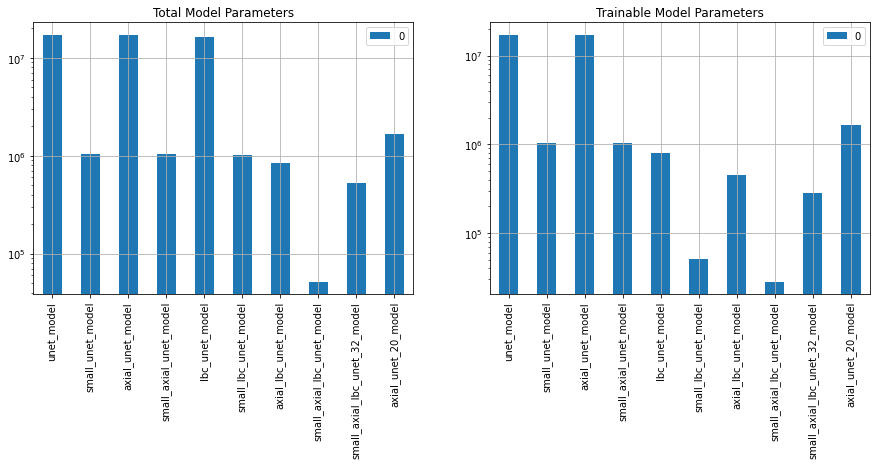

In [8]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
pd.DataFrame.from_dict(model_tot_param_dict, orient='index').plot.bar(ax=axs[0], title='Total Model Parameters', logy=True)
pd.DataFrame.from_dict(model_train_param_dict, orient='index').plot.bar(ax=axs[1], title='Trainable Model Parameters', logy=True)
axs[0].grid()
axs[1].grid();

Observations:
* Axial Unets have comparable number of parameters to regular Unets (both total and trainable)
* LBC networks have much less trainable parameters than axial and regular unets, but slightly less performance

Moving forward, does the lower number of trainable parameters in LBC style models result in faster training? If so there is value in the Axial LBC networks as they have higher performance from the axial attention component, but quicker training from the LBC component.

In [49]:
model = deeplabv3_resnet50(num_classes=3)
inp = torch.rand(2,3,224,224)
model(inp)['out'].shape

torch.Size([2, 3, 224, 224])

In [4]:
model = UNetLBP(3, 3)
inp = torch.rand(2,3,224,224)
flops = FlopCountAnalysis(model, inp)
print('UNet lbc FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
Uns

UNet lbc FLOPS:  3334.69696
(821220, 794697)


In [5]:
from fvcore.nn import FlopCountAnalysis
from torchvision.models import resnet18, densenet161, vgg16, mobilenet_v2
from torchvision.models.segmentation import deeplabv3_resnet50, deeplabv3_resnet101, lraspp_mobilenet_v3_large, deeplabv3_mobilenet_v3_large
from src.models.dsc.dsc_unet import UNetDSC
from src.models.lbcnn.lbc_unet import UNetLBP, SmallUNetLBP

device = 'cuda'
model = UNet(n_channels=3, n_classes=3, bilinear=True).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('UNet FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

model = SmallAxialUNetLBC(3, 3, 10).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('Small Axial LBC UNet FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

# model = SmallUNetLBP(3, 3).to(device)
# inp = torch.rand(1,3,224,224).to(device)
# flops = FlopCountAnalysis(model, inp)
# print('Small LBC UNet FLOPS: ', flops.total()/1000000)

model = deeplabv3_resnet101(num_classes=3).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('DeepLab FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

model = lraspp_mobilenet_v3_large(num_classes=3).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('lraspp FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

model = deeplabv3_mobilenet_v3_large(num_classes=3).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('mobilenet FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

model = UNetDSC(n_channels=3, n_classes=3, bilinear=True).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('UNet dsc FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

model = UNetLBP(3, 3).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('UNet lbc FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

model = SmallUNetLBP(3, 3).to(device)
inp = torch.rand(2,3,224,224).to(device)
flops = FlopCountAnalysis(model, inp)
print('SmallUNet lbc FLOPS: ', flops.total()/1000000)
print(get_n_params(model))

Unsupported operator aten::max_pool2d encountered 4 time(s)
Unsupported operator aten::sub encountered 16 time(s)
Unsupported operator aten::mul encountered 40 time(s)
Unsupported operator aten::softmax encountered 10 time(s)
Unsupported operator aten::add encountered 10 time(s)
Unsupported operator aten::max_pool2d encountered 2 time(s)


UNet FLOPS:  61509.353472
(17267523, 17267523)
Small Axial LBC UNet FLOPS:  4351.93296
(29180, 28280)


Unsupported operator aten::max_pool2d encountered 1 time(s)
Unsupported operator aten::add_ encountered 33 time(s)


DeepLab FLOPS:  92786.309632
(58626371, 58626371)


Unsupported operator aten::hardswish_ encountered 20 time(s)
Unsupported operator aten::add_ encountered 10 time(s)
Unsupported operator aten::hardsigmoid_ encountered 8 time(s)
Unsupported operator aten::mul encountered 9 time(s)
Unsupported operator aten::sigmoid encountered 1 time(s)
Unsupported operator aten::add encountered 1 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.



lraspp FLOPS:  811.159616
(3218478, 3218478)


Unsupported operator aten::hardswish_ encountered 20 time(s)
Unsupported operator aten::add_ encountered 10 time(s)
Unsupported operator aten::hardsigmoid_ encountered 8 time(s)
Unsupported operator aten::mul encountered 8 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.

Unsupported operator aten::max_pool2d encountered 4 time(s)
Unsupported operator aten::sub encountered 16 time(s)


mobilenet FLOPS:  3822.23136
(11020851, 11020851)
UNet dsc FLOPS:  7562.827776
(1983713, 1983713)


Unsupported operator aten::add_ encountered 10 time(s)
Unsupported operator aten::max_pool2d encountered 4 time(s)
Unsupported operator aten::sub encountered 16 time(s)
Unsupported operator aten::add_ encountered 6 time(s)
Unsupported operator aten::max_pool2d encountered 2 time(s)
Unsupported operator aten::sub encountered 8 time(s)


UNet lbc FLOPS:  3334.69696
(821220, 794697)
SmallUNet lbc FLOPS:  2016.07168
(57060, 51273)


In [64]:
import torchvision
print(torchvision.__version__)

0.8.2


In [22]:
from pthflops import count_ops

# Create a network and a corresponding input
device = 'cuda:0'
model = UNet(n_channels=3, n_classes=3, bilinear=True).to(device)
# model = SmallAxialUNetLBC(3, 3, 10).to(device)
inp = torch.rand(1,3,224,224).to(device)

# Count the number of FLOPs
count_ops(model, inp)

/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/pthflops/__init__.py:26: DeprecationWarning: Call to deprecated function count_ops_jit (JIT mode is deprecated, please update to pytorch 1.8.0 or newer and use FX.).
  return count_ops_jit(


FX is unsupported on your pytorch version, falling back to JIT


/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +
/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:266: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  warnings.warn("You are trying to export the model wit

RuntimeError: Unsupported: ONNX export of Pad in opset 9. The sizes of the padding must be constant. Please try opset version 11.